# KNN ALGORITHM

In [78]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt #data visualization

from sklearn.datasets import make_blobs #synthetic dataset
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.model_selection import train_test_split #train and test sets

In [79]:
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

In [80]:
#create synthetic dataset
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 4,
                       cluster_std = 1.5, random_state = 4)

In [81]:
X

array([[  2.93285385,  -8.62723217],
       [  8.92629175,   2.13941283],
       [  8.0371343 ,   4.71761689],
       [  4.40892954,  -4.40262978],
       [  7.68222071,   2.20139951],
       [ 11.87913335,  -0.72457325],
       [  9.34637193, -11.44263045],
       [  7.62489892,   1.70952466],
       [ 10.26860131,   0.81266459],
       [ 12.67563711,   1.53608781],
       [  4.07647215,  -6.03899635],
       [  2.1434758 ,  -7.43064551],
       [  4.56666374,  -3.07961233],
       [  7.8661093 ,   1.02629409],
       [ 10.21835548,   4.74698819],
       [ 11.52356734,   4.21448182],
       [ 11.36141513,   3.32485307],
       [  8.28557731,   4.56543595],
       [  9.83897183,  -0.77656997],
       [  7.60537239,   1.47114071],
       [  6.32288786,  -5.9889826 ],
       [ 11.95135091,  -9.77343661],
       [ 10.42560919,   1.01384833],
       [  4.12695976,  -5.35965466],
       [  8.43026586,   3.26511398],
       [  5.88402429,   3.38479434],
       [  5.51593604,  -6.29118556],
 

In [82]:
from collections import Counter

In [83]:
Counter(y)

Counter({2: 25, 0: 25, 1: 25, 3: 25})

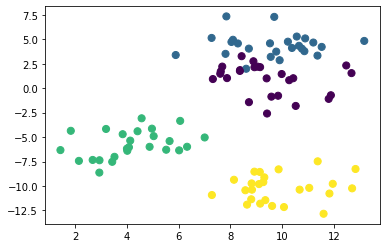

In [84]:
plt.scatter(X[:,0], X[:,1], c=y, marker= 'o', s=50)
plt.show()

# TRAIN TEST SPLIT

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# CREATE KNN MODEL ( K = 1) ( K=5)

In [86]:
Then we create a kNN classifier object. To show the difference between the importance of k value,
I create two classifiers with k values 1 and 5. Then these models are trained using train set. 
n_neighbors parameter is used to select k value. Default value is 
5 so it does not have to be explicitly written.

SyntaxError: invalid syntax (<ipython-input-86-f43312056f1f>, line 1)

In [87]:
knn5 = KNeighborsClassifier() #k=5
knn1 = KNeighborsClassifier(n_neighbors=1) #k=1

# FIT X_train and y_train in KNN MODEL

In [88]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# PREDICT THE TARGET VALUES

In [89]:
y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

# FINDING ACCURACY 

In [90]:
from sklearn.metrics import accuracy_score
print("Accuracy of kNN with k=5", accuracy_score(y_test, y_pred_5))
print("Accuracy of kNN with k=1", accuracy_score(y_test, y_pred_1))

Accuracy of kNN with k=5 0.92
Accuracy of kNN with k=1 0.92


# PASS THE TEST DATA TO THE CREATED MODEL

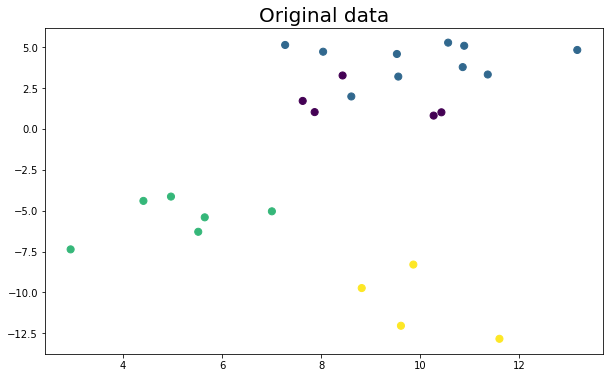

In [91]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker= 'o', s=50)
plt.title("Original data", fontsize=20)
plt.show()

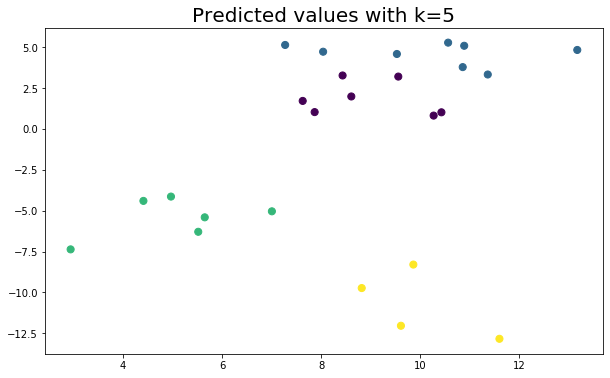

In [92]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= 'o', s=50)
plt.title("Predicted values with k=5", fontsize=20)
plt.show()

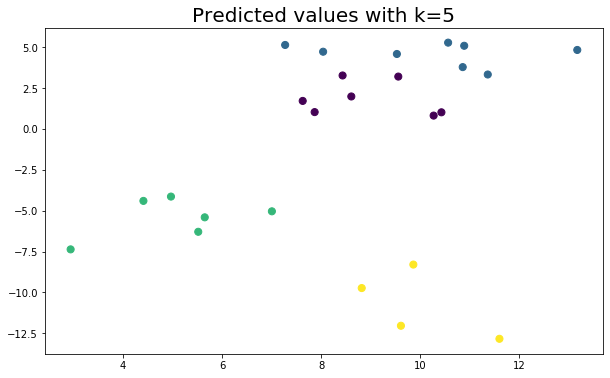

In [93]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= 'o', s=50)
plt.title("Predicted values with k=5", fontsize=20)
plt.show()

# CONCLUSION

# How to find the best k value

k=100: The model is too generalized and not a good predictor on both train and test sets. 
    This situation is known as underfitting.

In [94]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV

In [95]:
 GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [96]:
load_breast_cancer

<function sklearn.datasets._base.load_breast_cancer(*, return_X_y=False, as_frame=False)>

In [97]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [98]:
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid={'n_neighbors': np.arange(1,20)}, cv=5)

In [99]:
knn_grid.fit(X_cancer, y_cancer)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [100]:
knn_grid.best_params_


{'n_neighbors': 13}

# ADVANTAGE OF KNN

# DISADVANTAGE OF KNN

# OTHER PARAMETERS

In [101]:
knn13 = KNeighborsClassifier(n_neighbors=13)

In [102]:
knn13.fit(X_cancer,y_cancer)

KNeighborsClassifier(n_neighbors=13)

In [105]:
knn13.predict(X[[1]])

ValueError: query data dimension must match training data dimension